<a href="https://colab.research.google.com/github/kamfur/machine-learing-python/blob/master/tramCracowdelay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-23.csv')
df.head(10)

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
1,1,2018-07-23 06:00:47,612,Borsucza,22,Walcownia,2018-07-23 06:00:00,6.352185e+18,6351558574044899587,STOPPING,0,7.0
2,1,2018-07-23 06:00:48,572,Smolki,11,Czerwone Maki P+R,2018-07-23 06:00:00,6.352185e+18,6351558574044670211,STOPPING,0,10.0
3,1,2018-07-23 06:00:49,319,Jubilat,1,Wzgórza K.,2018-07-23 05:59:00,NaN,6351558574044363010,PLANNED,1,3.0
4,1,2018-07-23 06:00:49,322,Filharmonia,8,Bronowice Małe,2018-07-23 06:01:00,6.352185e+18,6351558574044592386,STOPPING,0,15.0
5,1,2018-07-23 06:00:50,325,Wawel,10,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044641539,PLANNED,1,8.0
6,1,2018-07-23 06:00:50,1360,Plac Wszystkich Świętych,1,Salwator,2018-07-23 05:59:00,NaN,6351558574044375298,PLANNED,1,27.0
7,1,2018-07-23 06:00:51,363,Hala Targowa,1,Salwator,2018-07-23 06:01:00,6.352185e+18,6351558574044379394,STOPPING,0,24.0
8,1,2018-07-23 06:00:52,78,Batorego,24,Bronowice Małe,2018-07-23 06:00:00,6.352185e+18,6351558574044948738,STOPPING,0,19.0
9,1,2018-07-23 06:00:52,77,Teatr Bagatela,20,Mały Płaszów,2018-07-23 06:01:00,6.352185e+18,6351558574044846339,PREDICTED,0,7.0


In [3]:
df[df.tripId == 6351558574044883205]

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
70,3,2018-07-23 06:01:42,379,Piasta Kołodzieja,21,Kopiec Wandy,2018-07-23 06:00:00,NaN,6351558574044883205,PLANNED,1,2.0
135,6,2018-07-23 06:02:46,382,Kleeberga,21,Kopiec Wandy,2018-07-23 06:01:00,NaN,6351558574044883205,PLANNED,1,3.0
284,12,2018-07-23 06:04:54,388,Dunikowskiego,21,Kopiec Wandy,2018-07-23 06:03:00,NaN,6351558574044883205,PLANNED,1,4.0
414,17,2018-07-23 06:06:40,2539,Rondo Hipokratesa,21,Kopiec Wandy,2018-07-23 06:05:00,NaN,6351558574044883205,PLANNED,1,5.0
493,20,2018-07-23 06:07:43,392,DH Wanda,21,Kopiec Wandy,2018-07-23 06:06:00,NaN,6351558574044883205,PLANNED,1,6.0
697,28,2018-07-23 06:10:39,2745,Rondo Kocmyrzowskie im. Ks. Gorzelanego,21,Kopiec Wandy,2018-07-23 06:09:00,NaN,6351558574044883205,PLANNED,1,7.0
772,31,2018-07-23 06:11:43,418,Os.Zgody,21,Kopiec Wandy,2018-07-23 06:10:00,NaN,6351558574044883205,PLANNED,1,8.0
1007,40,2018-07-23 06:14:58,2744,Plac Centralny im. R.Reagana,21,Kopiec Wandy,2018-07-23 06:13:00,NaN,6351558574044883205,PLANNED,1,9.0
1137,45,2018-07-23 06:16:49,423,Struga,21,Kopiec Wandy,2018-07-23 06:15:00,NaN,6351558574044883205,PLANNED,1,10.0


In [4]:
df.delay.value_counts(normalize = True)

0     0.426905
1     0.344715
2     0.123509
3     0.055987
4     0.025421
5     0.011410
6     0.004852
7     0.002657
8     0.001189
9     0.000867
10    0.000587
14    0.000503
12    0.000475
11    0.000350
13    0.000336
15    0.000154
16    0.000042
19    0.000028
18    0.000014
Name: delay, dtype: float64

count    71517.000000
mean         1.014039
std          1.357324
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         19.000000
Name: delay, dtype: float64

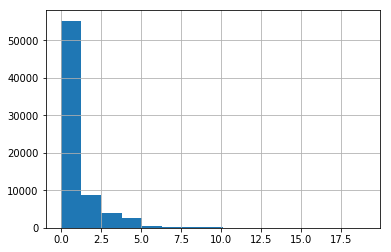

In [5]:
df.delay.hist(bins=15)
df.delay.describe()

In [6]:
df.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num'],
      dtype='object')

In [7]:
df.apply(lambda x: '{} {}'.format(x['number'], x['direction']), axis=1)

0             21 Kopiec Wandy
1                22 Walcownia
2        11 Czerwone Maki P+R
3                1 Wzgórza K.
4            8 Bronowice Małe
5             10 Kopiec Wandy
6                  1 Salwator
7                  1 Salwator
8           24 Bronowice Małe
9             20 Mały Płaszów
10              52 Os.Piastów
11          24 Bronowice Małe
12            9 Mistrzejowice
13               13 Bronowice
14           24 Kurdwanów P+R
15        3 Nowy Bieżanów P+R
16         50 Krowodrza Górka
17             20 Cichy Kącik
18        9 Nowy Bieżanów P+R
19          14 Bronowice Małe
20         50 Krowodrza Górka
21        9 Nowy Bieżanów P+R
22           22 Borek Fałęcki
23               5 Wzgórza K.
24               1 Wzgórza K.
25           22 Borek Fałęcki
26       52 Czerwone Maki P+R
27           19 Borek Fałęcki
28       13 Nowy Bieżanów P+R
29            11 Mały Płaszów
                 ...         
71487             22 Kombinat
71488            1 Wzgórza K.
71489    1

In [8]:
df['delay_secs']  = df['delay'].map(lambda x:x*60 )
df['direction_cat'] = df['direction'].factorize()[0]
df['vehicleId'].fillna(-1, inplace = True)
df['seq_num'].fillna(-1, inplace = True)
df['hour'] = pd.to_datetime( df['plannedTime'] ).dt.hour

def gen_id_number_direction(x):
    return  '{} {}'.format(x['number'], x['direction'])
                           
df['number_direction_id'] = df.apply(gen_id_number_direction, axis=1).factorize()[0]

def gen_id_stop_direction(x):
    return  '{} {}'.format(x['stop'], x['direction'])
df['stop_direction_id'] = df.apply(gen_id_stop_direction, axis=1).factorize()[0]


feats = ['number',
         'stop', 
         'direction_cat',
         'vehicleId',
         'seq_num',
         'number_direction_id',
         'stop_direction_id'
        ]

X = df[feats].values
y = df['delay_secs'].values

model = DecisionTreeRegressor(max_depth = 10, random_state=0)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error' )
np.mean(scores), np.std(scores)

(-48.911446275525776, 2.5252312592564357)